#### image classification

아래 사진 처럼 이미지 분류를 하고 싶다.

- 미시건 강의 참고 
[https://www.youtube.com/watch?v=0nqvO3AM2Vw&list=PL5-TkQAfAZFbzxjBHtzdVCWE0Zbhomg7r&index=3]
- 미시건 강의 정리 블로그 참고
[https://sunnyyanolza.tistory.com/19]

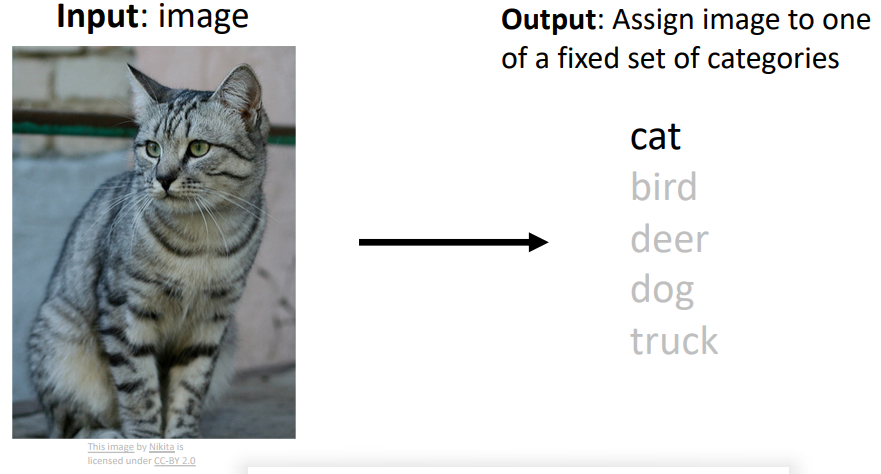

하지만 이미지 분류에 있어서 Semantic Gap이라는 문제가 발생한다.
- 이미지를 컴퓨터를 분류하기 위해서는 숫자로 인코딩을 하고 분석을 해야하는데 생기는 문제다

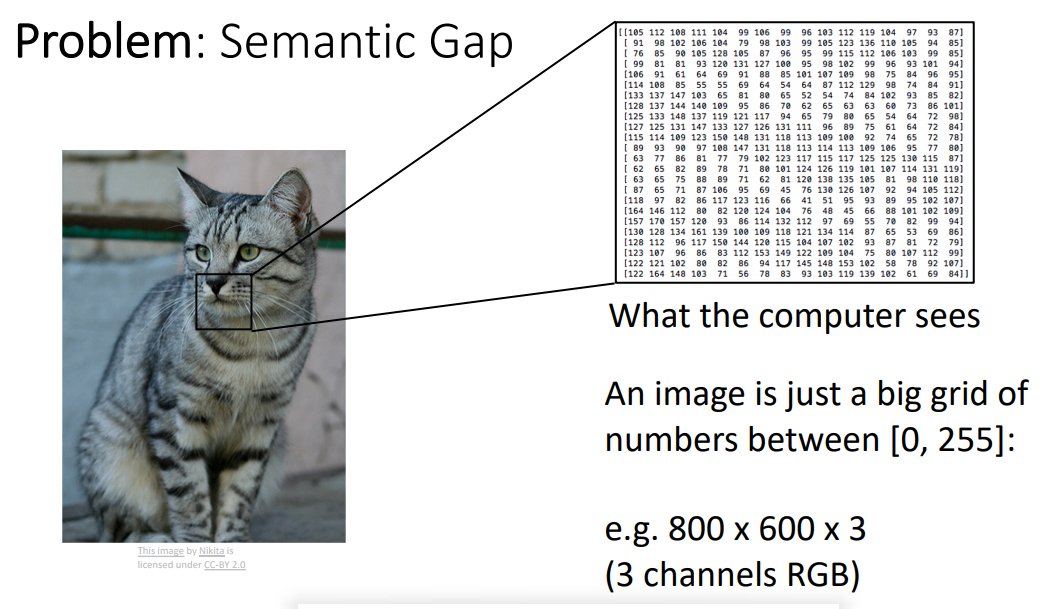

위 사진처럼 고양이 사진을 숫자로 표현했을 때 나오는 픽셀이 여러 상황에 따라 변화한다.
- Viewpoint variation : 같은 사진이라도 사진을 찍는 방향에 따라 다르게 보인다.
- interclass variation : 같은 카테고리 내의 사물이라도 생김새가 모두 다르다.
- Fine-Grained variation: 한 카테고리 내의 사물이라도 미세한 차이가 있다.
- Background clutter: 배경색과 사물의 색이 비슷하면 구분하기 어렵다.
- Illumination conditions: 조명의 변화에 따라 사물이 다르게 보인다.
- Deformation: 사물의 모습이 변형되는 경우도 있다.
- Occlusion: 사물이 가려져 일부만 보이는 경우도 있다.

같은 동물이라도 여러 종류의 사진과 환경이 있기 때문에 우리가 데이터 분석하는 데 있어서 고양이의 특징, 즉 귀나 코 꼬리 등등을 설정하여 분류를 한다는 것은 좋지 않다는 것이다.
- 예를 들어 귀나 발의 모양을 데이터 분석의 특징으로 넣는 다고 했을 때 새로운 고양이 사진을 분석할 때 그런 특징이 안나와 있을 수 있다.

#### 첫 번째 분석 도구
- Nearest Neighbor

NN 알고리즘은 매우 단순하게 작동한다. 이미지를 행렬로 전환하고 train image로 부터 행렬 값을 얻은 후 새로운 test 데이터가 들어올때 행렬 차를 구한뒤 모두 더하여 라벨과 가장 가까운 값을 정답으로 내놓는다.

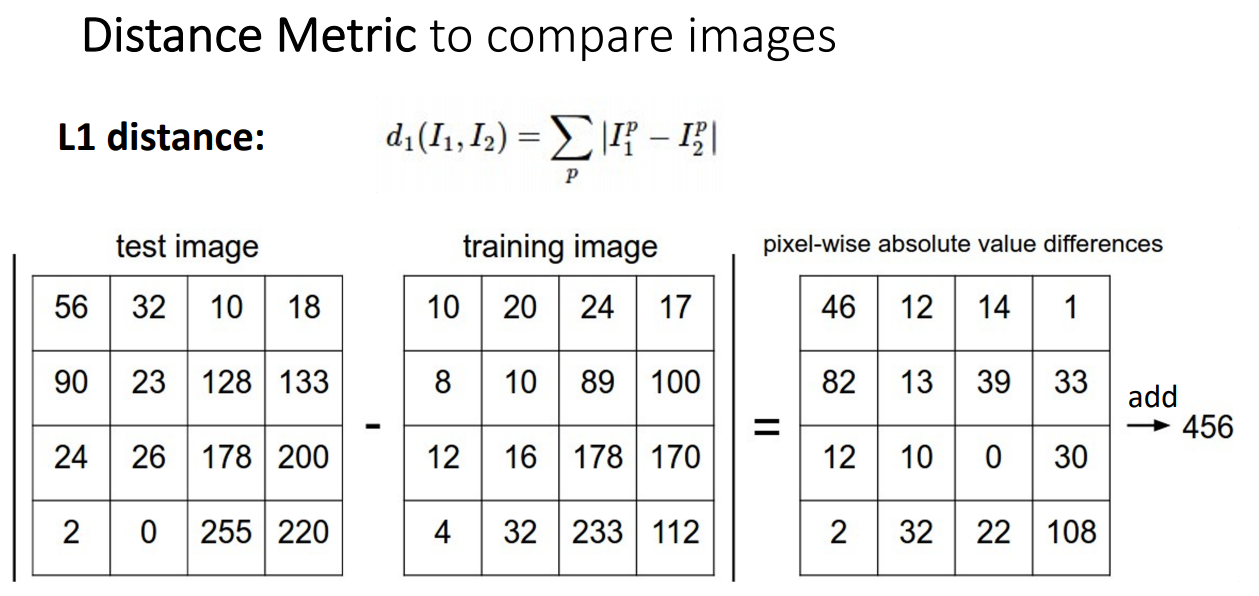

하지만 이런식의 분석방법은 위에서 언급했듯, 알고리즘 스스로가 이미지의 특성을 잘 잡아내지 못한다. 이 알고리즘은 단순 데이터의 픽셀 값을 최적화 시킨 후 test data와 차를 구해 답을 찾을 뿐이다. 그렇기 때문에 이미지에 필터가 걸리거나 사진의 감성? 부분이 전혀 다르면 다른 답을 놓을 확률이 크다. 즉, 이상치에 매우 약하다.

아래 예시는 NN 알고리즘을 사용했을때 결과이다. 
- 빨강은 틀린 것이다.
- 초록은 맞춘것이다.
- 예시를 보면 알 수 있듯 nn알고리즘의 정확도는 비슷한 사진일 경우에 잘 맞추는 모습을 볼 수 있다. 전체적으로 보면 정답률은 매우 낮다.

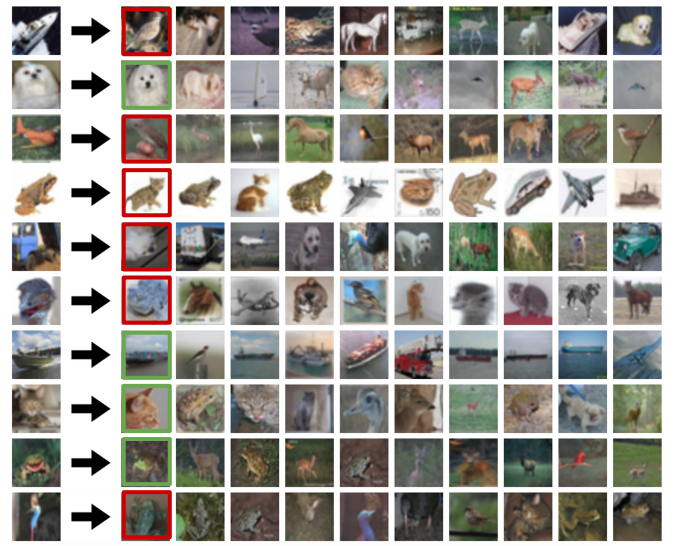

위와 같이 1 대 1 비교의 이상치에 취약한 문제를 해결하기 위한 방법으로 KNN알고리즘이 있다.
- K는 주위 몇개의 값을 비교하여 정답을 낼 것인지에 해당한다. 
- 만약 k가 2라면 2개를 비교하여 정답을 낸다.
- 위 처럼 1개에 대한 이상치에 취약하다면 그보다는 덜 할 수 있다.

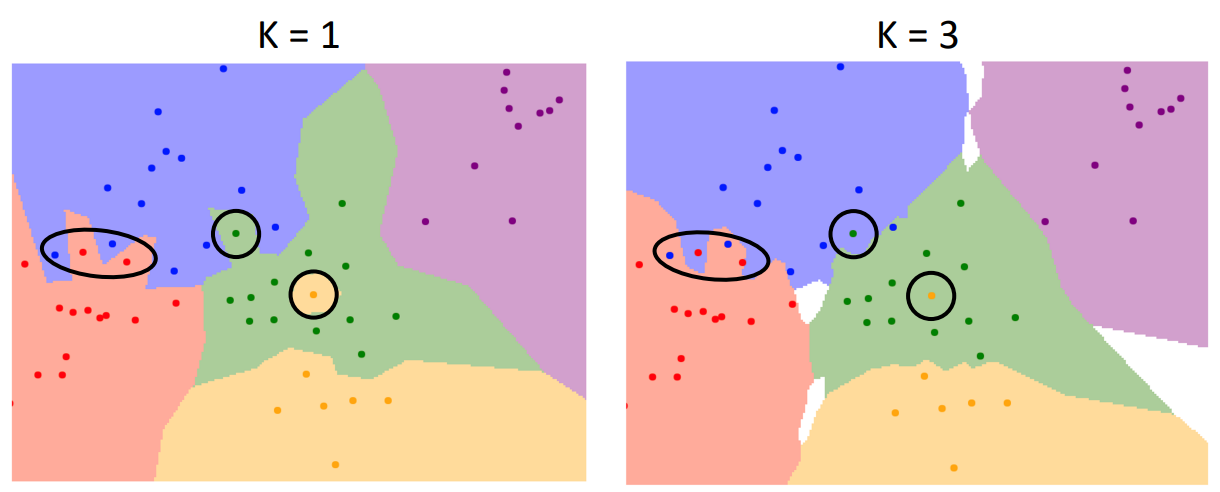

KNN을 좀 더 높은 정확도를 가지기 위해 여러 거리 측정 방법이 있다.
- 가장 기본적인 방법으로는
    - L1(Manhattan) distance
    - L2 (Euclidean) distance

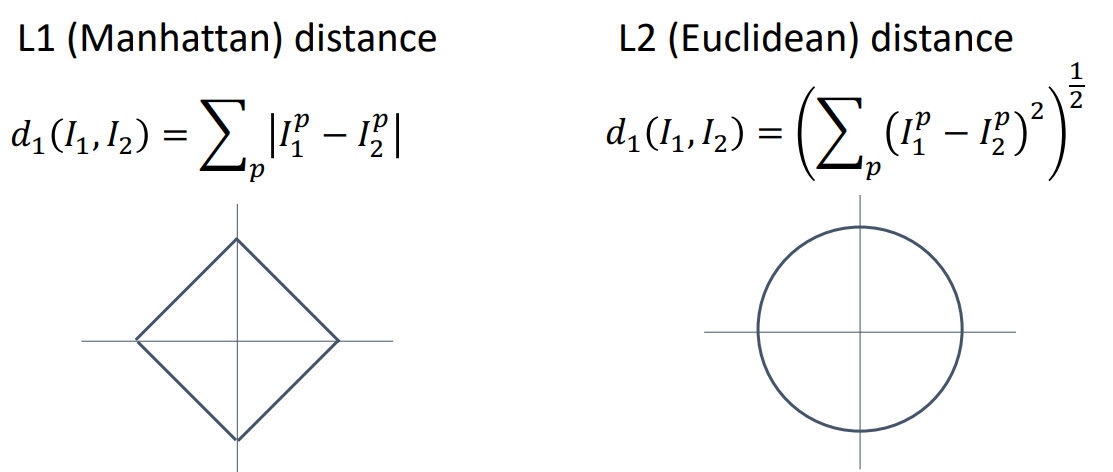

### Hyperparameters
- 그럼 우리는 이제 하이퍼 파라미터를 고민해 볼 수 있다.
- 하이퍼 파라미터는 설정 값이라고 생각하면 된다. 즉, k값

사실 k값은 직접 입력해 봐야 어떤 것이 가장 좋은 정확도를 보이는 지 알 수 있다. 하지만 1로 설정하는 것은 이상치에 매우 약하므로 좋지 않은 선택이다.
- 경험상 최소 3 이상으로 하고 20 이하로 분석을 하는 것 같다.

k값 말고도 우리는 데이터 전처리 할 때 어떻게 나누고 어떻게 분석을 할지도 고민해야한다.
- 모든 데이터를 train으로 설정하여 할 수 있다.
    - 하지만 test를 해볼 수 없기 때문에 정확도에 확신을 할 수 없다.
- 70프로는 train 30프로는 test로 설정 할 수 있다.
    - 하지만 이건 test로 들어가는 값을 최대한 정확도가 높게 설정 할 수 있고 새로들어오는 값에 대해서는 약할 수 있다.,
- 60프로는 train 20프로는 검증 20프로는 test로 설정할 수 있다,.
    - 이 방식은 검증을 통해 정확도를 높이고 새로운 데이터에 test해봄으로써 새로운 데이터가 들어와도 강력한 정확도를 가질 수 있다.
- 60프로는 train 20프로는 검증 20프로는 test로, 이때 검즈 20프로의 구간을 여러번 바꾼다.
    - 이 방식은 가장 좋은 정확도의 부분을 찾을 수 있기 때문에 가장 좋은 방법이다.

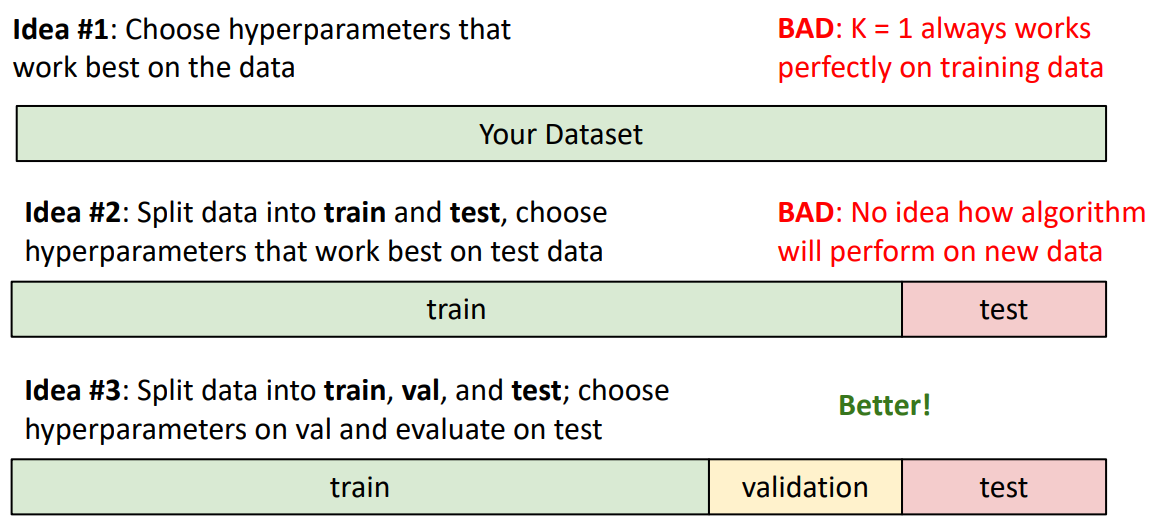

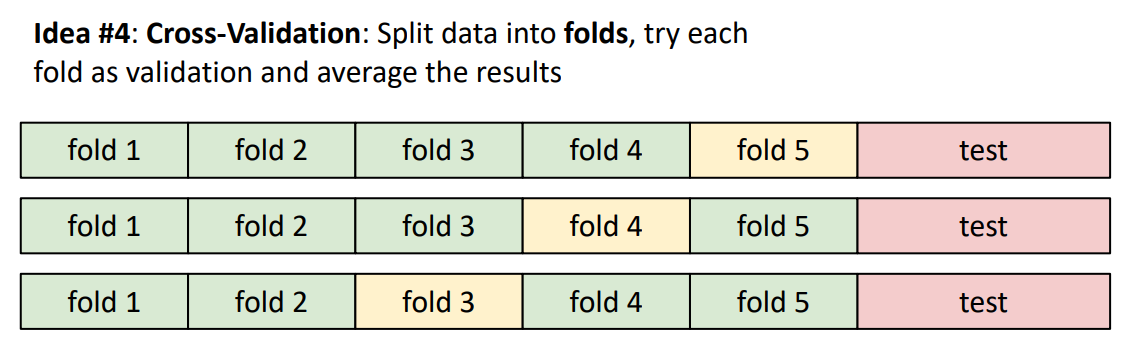

아래 결과와 같이 가장 좋은 K값을 찾아 설정한다.

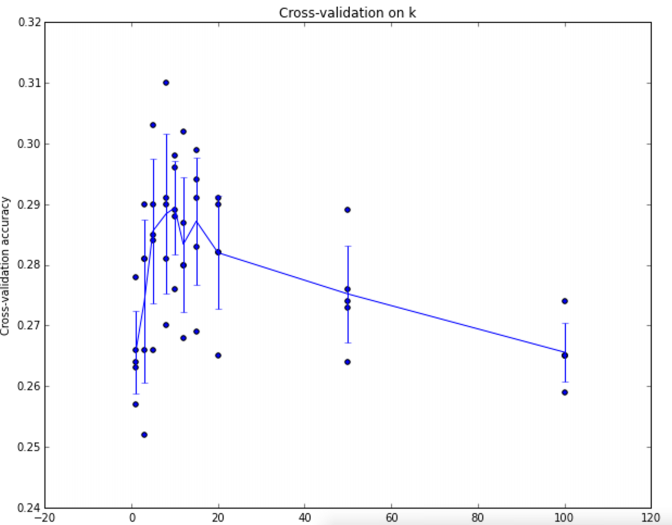

결과적으로 KNN은 이미지를 분류하기에 좋은 알고리즘이 아니라는 것을 알 수 있다.
- 간단하면서 이해하기 쉬운 장점이 있다.
- training단계가 시간이 오래 걸린다.
- 거리 계산 법을 줄이기 위한 연구는 아직 지속되고 있다.
- 유사 이미지에 필터만 달라도 분석하기 힘들다.

그리고 분석을 하는데 있어서 우리는 차원의 저주에 걸릴 수 있다.
- 우리가 분석할 때 차원의 수(데이터의 변수)가 많으면 우리가 고려해야할 점이 점점 많아진다는 것이다.
- 강의에서는 우주의 경우보다 많은 경우도 있다.

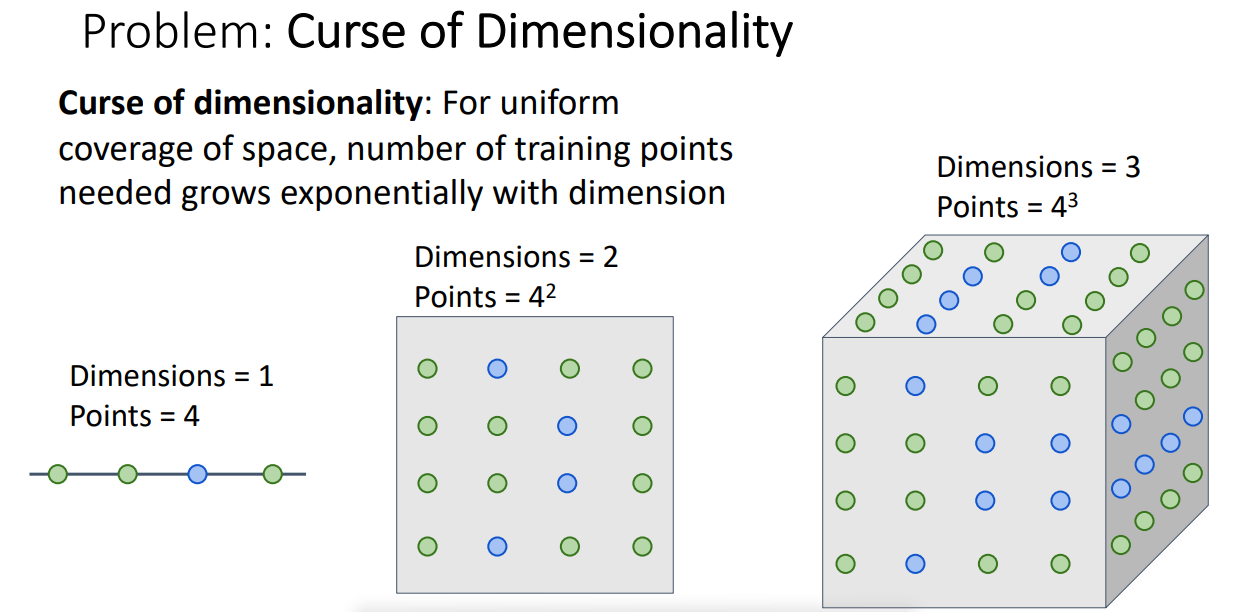

앞으로의 강의가 이런 문제를 어떻게 해결하고 이미지를 분류하는데 있어서 어떤 사고방식이 좋은 방향으로 흐를 수 있게 도와주는지 알 수 있을 것 같다.!